# Introduction to models

With normal programming, we have:

Rules + Input   -> Output

With machine learning, we have:

Input + Expected Output -> Rules.

This notebook runs through a very simple machine learning algorithm: Linear Regression.

## My First Model: Linear Regression

### The problem

In the file `cluster.csv`, there are measurements of how many emails were processed in an hour by a cluster of `n` cores. We want to find out how much capacity we gain per core added.

In other words, we want to find `w` such that:

`emails_processed = w * number_of_cores`.

This is an example of a _regression problem_.

Given `X` number of cores, predict `y`, the number of emails processed.

### Setting up

We first use the `pandas` package to load our data. `pandas`, and `numpy` are essential packages for data management in machine learning with python. You can see some cheat sheets for these packages here:

[pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

[numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

In [6]:
import pandas as pd
cluster = pd.read_csv('cluster.csv')
cluster.head()

,cores,emails_processed,hour
0,1,237,1
1,1,233,2
2,1,230,3
3,1,237,4
4,1,225,5


It's good practice to always plot our data:

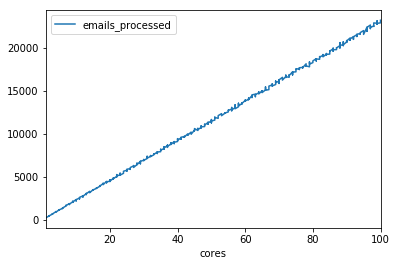

In [8]:
import matplotlib.pyplot as plt

cluster.plot(x='cores',y='emails_processed')
plt.show()

Our data follows a clear linear trend!

It's a good idea to divide our data into _training_ and _test_ sets.

We also divide it up into predictors _X_ and predicted _y_.

We can use the helper function train_test_split to shuffle our data and allocate 20% of it to testing.


In [15]:
from sklearn.model_selection import train_test_split
X = cluster['cores']
y = cluster['emails_processed']The
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Training

In machine learning, our data is always noisy. And small changes in our data (or random seed!) will yield a different model.


Model training works by minimizing a _loss function_. The loss function  measures how inaccurate our model is. 

For this problem, we will use the mean squared error loss function

`MSE = (emails_processed - w*cores)^2`.

Keras has an optimizer that will find the values that minimize the loss.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(1,init='uniform', activation='linear',input_dim=1))
model.compile(loss='mse', optimizer='rmsprop')

model.fit(X_train, y_train, epochs=50, batch_size=16,verbose=0)
score = model.evaluate(X_test, y_test, batch_size=16)



### Interpreting the model

### Evaluating the model

# Multiple Linear Regression
